# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style

reading the dataset through pandas

In [2]:
df=pd.read_csv('/content/email.csv')

first five columns will be printed

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA: exploratory data analysis

In [4]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
print('number of not available values')
print(df.isnull().sum())

number of not available values
Category    0
Message     0
dtype: int64


 Added a Category Number column with ham: 0 and spam: 1

In [7]:
df['Category_Number'] = df['Category'].map({'ham': 0, 'spam': 1})

In [8]:
print(df['Category_Number'].head())


0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Category_Number, dtype: float64


## **Data Visualization**

WordCloud for spam and ham words

In [11]:
from wordcloud import WordCloud

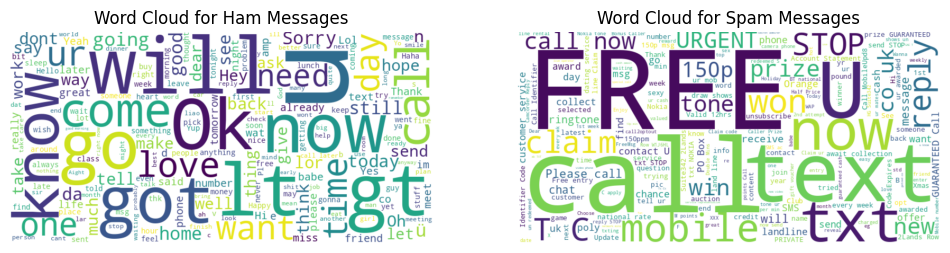

In [12]:
ham_messages = df[df['Category'] == 'ham']['Message']
spam_messages = df[df['Category'] == 'spam']['Message']

ham_text = ' '.join(ham_messages)
spam_text = ' '.join(spam_messages)

ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.show()

pie chart plotted for occurences of each category

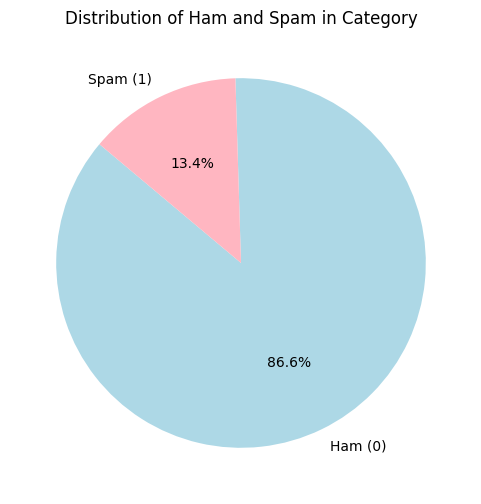

In [40]:
category_counts = df['Category_Number'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=['Ham (0)', 'Spam (1)'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Ham and Spam in Category')
plt.show()

It calculates the number of words in each message from the 'Message' column.

In [14]:
df['Word_Count'] = df['Message'].apply(lambda x: len(str(x).split()))

In [15]:
df.head()

,Category,Message,Category_Number,Word_Count
0,ham,"Go until jurong point, crazy.. Available only ...",0.0,20
1,ham,Ok lar... Joking wif u oni...,0.0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1.0,28
3,ham,U dun say so early hor... U c already then say...,0.0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0,13


In [17]:
df=df.dropna()

Created a seaborn boxplot or barplot to visualize the word count distribution by category

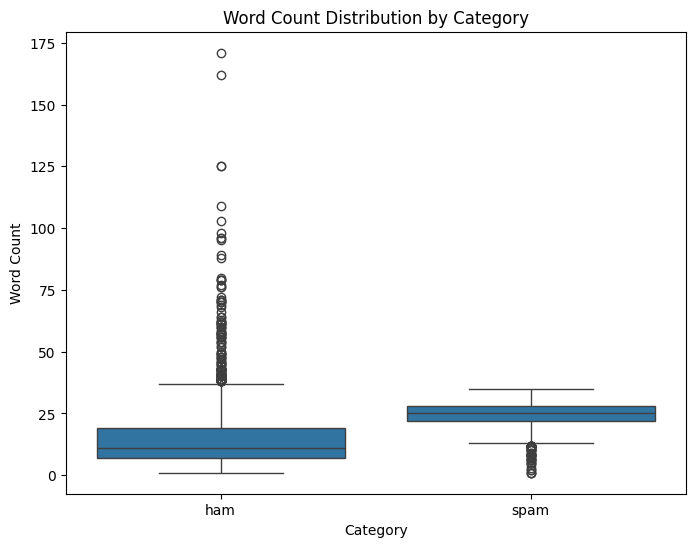

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Word_Count', data=df)

# Adding labels and title
plt.title('Word Count Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')

# Show the plot
plt.show()

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X=df['Message']
y=df['Category_Number']

80% training data and 20% testing data

In [21]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer


converts raw text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) while removing common English stopwords (is, the etc that makes noise in the data).

In [23]:
# While excluding common English stopwords
vectorizer = TfidfVectorizer(stop_words='english')
# Convert text to TF-IDF vector
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Multinomial Naïve Bayes (MultinomialNB) model for text classification.

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB
MultinomialNB()

MultinomialNB()

In [27]:
# Prediction on test set
y_pred = model.predict(X_test_tfidf)

In [36]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

class_names = ['ham', 'spam']
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.98
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

The confusion matrix helps understand how many predictions were correct and incorrect.

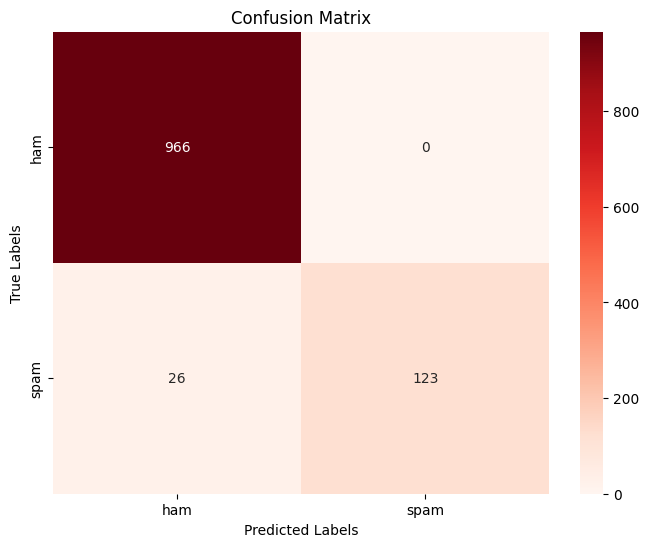

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Define class_names here
class_names = ['ham', 'spam']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

for the new text, it is predicting the emails

In [34]:
new_emails = ["You've been selected for a special offer. Click here to claim your prize!","Congratulations! You've won a free ticket.", "Hi, can we schedule a meeting tomorrow?"]
new_emails_tfidf = vectorizer.transform(new_emails)
predictions = model.predict(new_emails_tfidf)

for email, pred in zip(new_emails, predictions):
    print(f'Email: "{email}" -> Prediction: {pred}')

Email: "You've been selected for a special offer. Click here to claim your prize!" -> Prediction: 1.0
Email: "Congratulations! You've won a free ticket." -> Prediction: 0.0
Email: "Hi, can we schedule a meeting tomorrow?" -> Prediction: 0.0
